### Median Home Value Prices for Neighborhoods in Pittsburgh

#### This notebook will show us which neighborhoods have the highest median home value prices in Pittsburgh. Obviously the higher the home value, the better the neighborhood and the condition of it is.

##### These are the necessary libraries we will be using

In [291]:
import pandas as pd
import geopandas
import matplotlib as mp
%matplotlib inline

##### Loading the csv file

In [261]:
# Let's read the csv file
df = pd.read_csv('housing.csv')

# Dropping any rows that do not have a home price
df.dropna(inplace=True)

##### Since the data of the home value prices are from 2010, we will need to adjust all the prices for inflation

In [262]:
# Looking at only the median home value column
df.iloc[0:, 21:22].head(5)

,Median Home Value (2010)
1,"$123,600"
2,"$42,200"
3,"$44,200"
5,"$110,900"
6,"$81,100"


##### But first, we need to convert every home value into a floating point number since it is currently of the string data type

In [263]:
# temp_list will carry the converted home values into floating point numbers which will be then added to a new dataframe
temp_list = []

# Getting the home values that are going to be converted
prices = df["Median Home  Value (2010)"]


# Iterating through every value in the column. We are also stripping the "$" and "," characters so it is just the integers
for value in prices.iteritems():
    x = str(value[1])
    x = x.strip('$')
    x = x.replace(',', '')
    temp_list.append(float(x))

    
# Now creating a dictionary that will hold two columns: the list of neighborhoods and its associated median home value price    
d = {'Neighborhood': df["Neighborhood"], 'Median Home Value (2010)': temp_list}


# Creating the data frame that will hold the two columns
home_price_df = pd.DataFrame(data=d)

home_price_df.head() # Prices are now floating point numbers

,Neighborhood,Median Home Value (2010)
1,Allegheny West,123600.0
2,Allentown,42200.0
3,Arlington,44200.0
5,Banksville,110900.0
6,Bedford Dwellings,81100.0


##### Now that we have the median home value prices for each neighborhood in the correct format, we can adjust it for inflation
- The formula for calculating the inflation rate since a given year: CPI in XXXX / CPI in YYYY
- The CPI is the consumer price index which is the price of a weighted average market basket of consumer goods and services purchased by households.
- CPI in 2010: 216.253, CPI in 2021: 279.341
- Source: https://www.in2013dollars.com/Housing/price-inflation/

In [264]:
# 279.341 / 216.253 = 1.292
inflation = 1.292

# For every value in the Home Value column, we are applying a lambda function 
# to it which just multiplies the value by 1.292
home_price_df["Median Home Value (2010)"] = home_price_df["Median Home Value (2010)"].apply(lambda x: x * inflation)


home_price_df.head() # The prices now reflect the median home value in 2021 for each neighborhood in Pittsburgh

,Neighborhood,Median Home Value (2010)
1,Allegheny West,159691.2
2,Allentown,54522.4
3,Arlington,57106.4
5,Banksville,143282.8
6,Bedford Dwellings,104781.2


##### Let's rename the home value column to clarify that it has been adjusted for inflation

In [265]:
home_price_df = home_price_df.rename(columns={"Median Home Value (2010)": "Median Home Value (2010) Adjusted"})
original = home_price_df
home_price_df.head(2)

,Neighborhood,Median Home Value (2010) Adjusted
1,Allegheny West,159691.2
2,Allentown,54522.4


In [266]:
# home_price_df = home_price_df.groupby("Neighborhood").sum()["Median Home Value (2010) Adjusted"]
# home_price_df = home_price_df.sort_values(ascending=False)
# home_price_df

##### Now let's load a map of Pittsburgh. We are going to need to feed it data since it only shows us the layout of the city

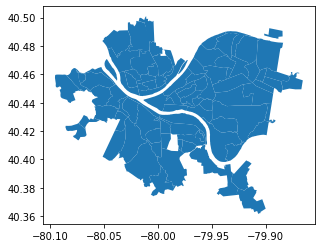

In [267]:
neighborhoods = geopandas.read_file('Neighborhoods_.shp') # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

##### Now we are merging the data of the home value prices from the home_price_df dataframe to the geopandas dataframe

In [286]:
# Merging the two dataframes
home_value_map = neighborhoods.merge(home_price_df, how='left', left_on='hood', right_on='Neighborhood')

# looking to confirm if it merged correctly
home_value_map[['hood','Median Home Value (2010) Adjusted','geometry']].head()

,hood,Median Home Value (2010) Adjusted,geometry
0,Central Oakland,186500.2,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,352716.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,78941.2,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,122223.2,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,209045.6,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


##### Now let's plot the map with our data on it!

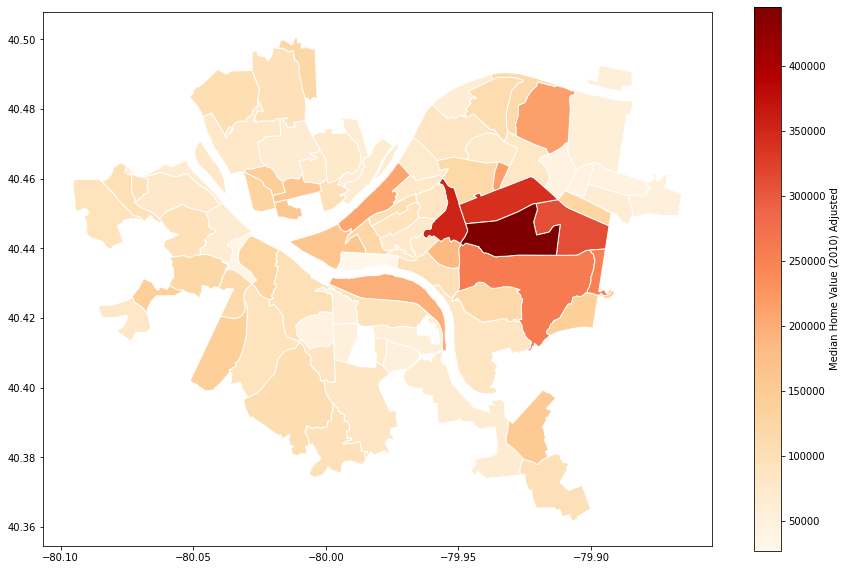

In [289]:
home_value_map.plot(column='Median Home Value (2010) Adjusted', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Median Home Value (2010) Adjusted"}, # label the legend
               figsize=(15, 10),         # set the size
               )

##### Now that we can see what areas have the highest median home value, we need to know the names of those neighborhoods

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt

##### Let's make a barplot using seaborn

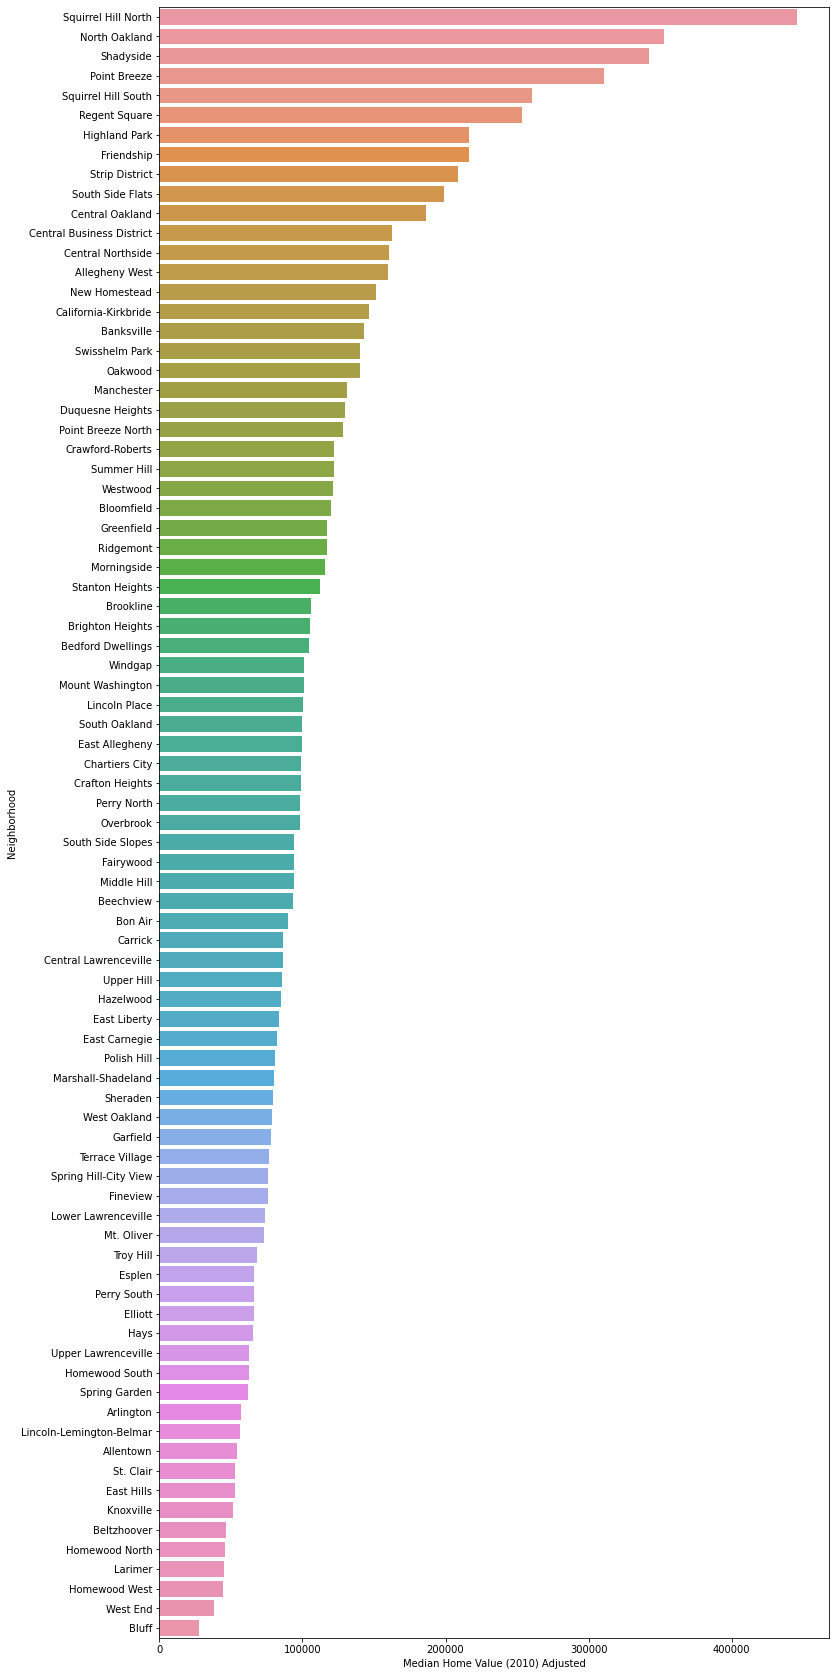

In [290]:
fig_dims = (12, 30)
fig, ax = plt.subplots(figsize=fig_dims)

ax = sns.barplot(x="Median Home Value (2010) Adjusted", # x axis label
                 y="Neighborhood", # y axis label
                 ax=ax, # figsizes
                 data=original, # data we want to show
                 orient="h", # orientation of the graph
                 order=home_price_df.sort_values("Median Home Value (2010) Adjusted", 
                 ascending = False).Neighborhood) # Sorting the values from greatest to least

#### Conclusion:

##### The neighborhood with the highest median home value is Squirrel Hill North!